# Quick analysis with Python

In [0]:
%matplotlib inline 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde

### Load well curves

#### It so easy to save *.las file into *.csv, for this first approach, only these curves are needed DEPT, GR, Res and RHOB.

In [2]:
logs=pd.read_csv('Well.csv')
logs.columns

Index(['DEPT', 'GR', 'Res', 'CALI', 'RHOB'], dtype='object')

In [0]:
tops = ('TOP','BASE')
tops_depths=(2041, 2602)

### Plot Density

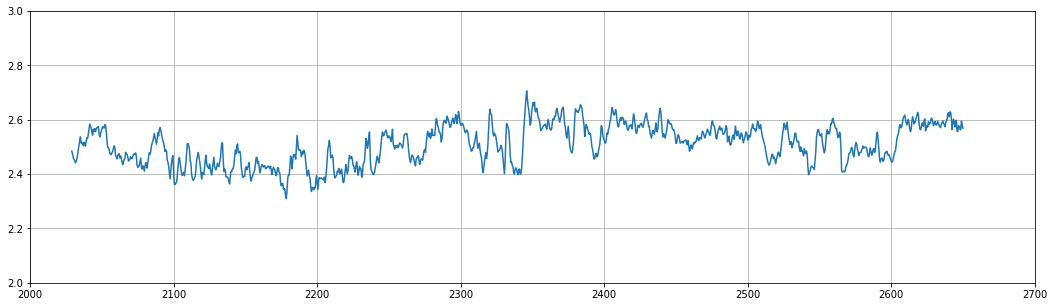

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,5))
plt.plot(logs['DEPT'],logs['RHOB'], lw=1.5)
plt.ylim(2, 3)
plt.xlim(2000, 2700)
plt.grid()

In [5]:
logs.columns

Index(['DEPT', 'GR', 'Res', 'CALI', 'RHOB'], dtype='object')

In [0]:
def GRvsRhob(GR, Rhob):

        x=GR
        y=Rhob
        xy = np.vstack([x,y])
        z = gaussian_kde(xy)(xy)
        fig, ax = plt.subplots()
        ax.scatter(x, y, c=z, s=50, edgecolor='', alpha=0.3, cmap='terrain')
        ax.set_xlim(20,120)
        ax.set_xlabel('GR [api]')
        ax.set_ylabel('Rhob')
        ax.grid()

        plt.show()

## Define a Zone to make petrophysic analysis

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


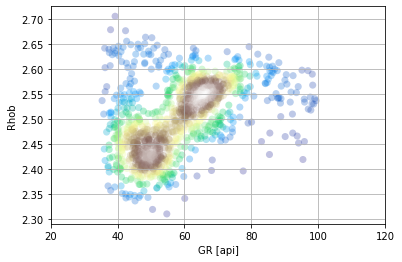

(array([ 2.,  1.,  8.,  6., 14., 27., 41., 47., 70., 55., 53., 68., 75.,
        60., 54., 60., 61., 69., 78., 84., 69., 39., 27., 16., 20., 13.,
         3.,  2.,  0.,  1.]),
 array([2.31  , 2.3232, 2.3364, 2.3496, 2.3628, 2.376 , 2.3892, 2.4024,
        2.4156, 2.4288, 2.442 , 2.4552, 2.4684, 2.4816, 2.4948, 2.508 ,
        2.5212, 2.5344, 2.5476, 2.5608, 2.574 , 2.5872, 2.6004, 2.6136,
        2.6268, 2.64  , 2.6532, 2.6664, 2.6796, 2.6928, 2.706 ]),
 <a list of 30 Patch objects>)

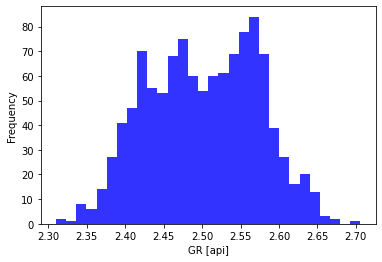

In [7]:
# Create a Zone of the datafram logs called Z1

Z1 = logs[(logs.DEPT >= 2041) & (logs.DEPT <= 2602)]

GRvsRhob(Z1.GR, Z1.RHOB)

fig, ax1 = plt.subplots()

ax1.set_xlabel('GR [api]')
ax1.set_ylabel('Frequency')
ax1.hist(Z1.RHOB.dropna(),bins=30,color='blue', alpha=0.8)

# With plot you can make your own guesses of distribution families in data
# In this case one will be Sand family and the other clay family

## Inspect GR curve to defime GR min and GR max

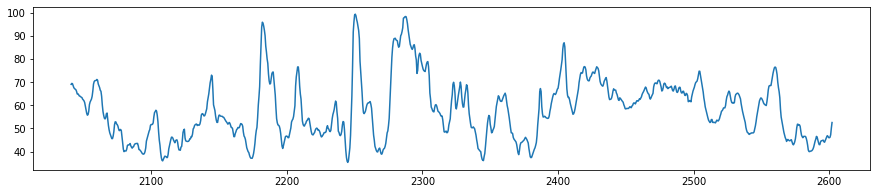

In [8]:
plt.figure(figsize=(15,3))
plt.plot(Z1.DEPT, Z1.GR)

In [0]:
GRmax = 100
GRmin = 37

In [10]:
Z1['VCL'] = 1 - ((GRmax - Z1.GR) / (GRmax - GRmin))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


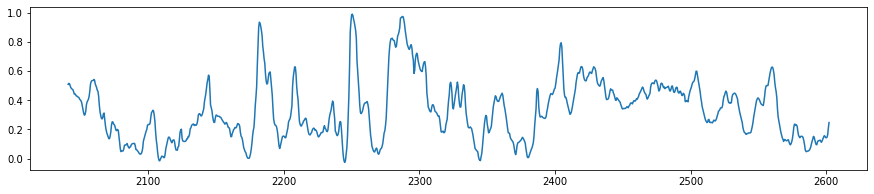

In [11]:
plt.figure(figsize=(15,3))
plt.plot(Z1.DEPT, Z1.VCL)

### Define a function to calculate Porosity

### Using only Density Log 

In [0]:
def phi(den_log, den_matrix, den_fluid, den_shale):
    phi = (den_log - den_matrix) / (den_fluid - den_matrix)
    return phi

def phi_shale(den_shale, den_matrix, den_fluid):
    phi_shale = (den_shale - den_matrix) / (den_fluid - den_matrix)
    return phi_shale

def phi_shale_corrected(den, den_matrix, den_fluid, den_shale, vcl):
    phi = (den - den_matrix) / (den_fluid - den_matrix)
    phi_shale = (den_shale - den_matrix) / (den_fluid - den_matrix)
    phi_sh_corr = phi - vcl * phi_shale
    return phi_sh_corr

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(2041.0, 2602.0)

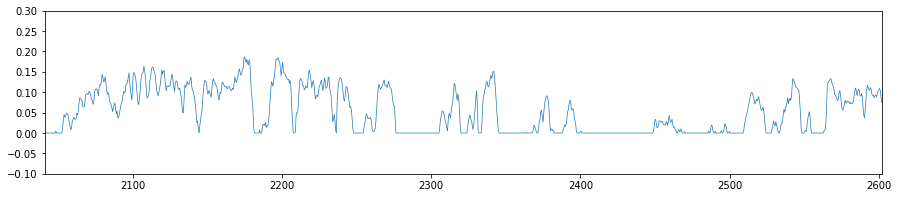

In [13]:
den_matrix, den_fluid, den_shale = 2.65, 1.1, 2.4


Z1['PHID']=phi(Z1.RHOB, den_matrix, den_fluid, den_shale)
Z1['PHIDshc']=phi_shale_corrected(Z1.RHOB, den_matrix, den_fluid, den_shale, Z1.VCL).clip(0,1)

plt.figure(figsize=(15,3))
plt.plot(Z1['DEPT'],Z1['PHIDshc'], lw=0.7)
plt.ylim(-0.1, 0.3)
plt.xlim(2041, 2602)

In [14]:
Z1['PHIE']=Z1['PHIDshc']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
Z1.columns

Index(['DEPT', 'GR', 'Res', 'CALI', 'RHOB', 'VCL', 'PHID', 'PHIDshc', 'PHIE'], dtype='object')

In [0]:
#d=logs[(logs.DEPT >= 1850) & (logs.DEPT <= 2100)]

### Water Saturation

In [0]:
def SW_archie(Rw, Rt, Poro, a, m, n):
        F = a / (Poro**m)
        Sw_archie = (F * Rw/Rt)**(1/n)
        return Sw_archie

In [0]:
def SW_simand(Rw, Rt, Rsh, Poro, a, m, Vsh):
        F = Vsh/Rsh
        G = (a*Rw)/(Poro**m)
        Sw_simand= (G/2)*(((F)**2+ (4/(G*Rt)))**0.5 - F)
        return Sw_simand

In [0]:
a=1 #turtuosity factor
m=1.65 #cementation factor
n=1.7 #saturation exponent

In [0]:
rwa=0.32
Rw =rwa
Rsh=4

## In this case Simandoux was choosed but archie will be use, you can modify your own equation

In [21]:
Z1['SWa']=(SW_simand(Rw,Z1.Res,Rsh,Z1.PHIE,a,m,Z1.VCL)).clip(0,1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
Z1['BVW']=Z1['SWa']*Z1['PHIE']

# In case you can obtain a density matrix 
# Z1['matrix']=1-f.VCL-Z1.PHIE

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
Z1.columns

Index(['DEPT', 'GR', 'Res', 'CALI', 'RHOB', 'VCL', 'PHID', 'PHIDshc', 'PHIE',
       'SWa', 'BVW'],
      dtype='object')

In [0]:
Zone=Z1.copy()

In [25]:
Zone.columns

Index(['DEPT', 'GR', 'Res', 'CALI', 'RHOB', 'VCL', 'PHID', 'PHIDshc', 'PHIE',
       'SWa', 'BVW'],
      dtype='object')

## Get a NetPay with your own cutoffs

In [26]:
NetPay = Z1[(Z1.DEPT>=2041) & (Z1.DEPT<=2602)]

ssb=((NetPay.VCL <= 0.25) & (NetPay.SWa <= 0.65) & (NetPay.PHIE >= 0.05))
temp_lfc=np.zeros(np.shape(NetPay.VCL))
temp_lfc[ssb.values]=1
NetPay.insert(NetPay.columns.size, 'PayFlag', temp_lfc)
NetPay.columns

Index(['DEPT', 'GR', 'Res', 'CALI', 'RHOB', 'VCL', 'PHID', 'PHIDshc', 'PHIE',
       'SWa', 'BVW', 'PayFlag'],
      dtype='object')

# Finally plot our humble analysis, you could make more robust

In [0]:
def Petrophysic_plot(top_depth,bottom_depth):
    
    f = Zone[(Zone.DEPT >= top_depth) & (Zone.DEPT <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,10), sharey=True)
    fig.suptitle("Well Interpretation", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)

#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        for (i,j) in zip(tops_depths,tops):
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=0.5, color='black')
                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')
    
        
#1st track: GR, CALI 
    
    ax01=ax[0].twiny()
    ax01.set_xlim(0,120)
    ax01.plot(logs.GR, logs.DEPT, label='GR[api]', color='green') 
    ax01.spines['top'].set_position(('outward',0))
    ax01.set_xlabel('GR[api]',color='green')    
    ax01.tick_params(axis='x', colors='green')
    ax01.grid(True)
    
    ax02=ax[0].twiny()
    ax02.set_xlim(0,30)
    ax02.plot(NetPay.PayFlag, NetPay.DEPT, label='payflag', color='blue', lw=0.5)
    ax02.spines['top'].set_position(('outward',40))
    ax02.fill_betweenx(NetPay.DEPT,0,NetPay.PayFlag,color='gray')
    ax02.set_xlabel('PayFlag',color='black')    
    ax02.tick_params(axis='x', colors='black')  
    
      
#2nd track: Resistivities

    ax11=ax[1].twiny()
    ax11.set_xlim(0.1,50)
    ax11.set_xscale('linear')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward',40))
    ax11.set_xlabel('Res[m.ohm]', color='blue')
    ax11.plot(logs.Res, logs.DEPT, label='Res[m.ohm]', color='blue')
    ax11.tick_params(axis='x', colors='blue')    
        
                # Petrophycal curves

#4th track: VCL, RHOBC

    ax21=ax[2].twiny()
    ax21.set_xlim(0,1)
    ax21.spines['top'].set_position(('outward',40))
    ax21.plot(f.VCL, f.DEPT, label='VCL', color='green',linewidth=0.5)
    ax21.set_xlabel('VCL', color='green')    
    ax21.tick_params(axis='x', colors='green')
    ax21.fill_betweenx(f.DEPT,f.VCL,1,color='gold',label= 'Vclay')
    ax21.fill_betweenx(f.DEPT,f.VCL,0,color='gray',label= 'Shale')
    ax21.legend(loc='lower left')
    
    ax22=ax[2].twiny()
    ax22.set_xlim(1.95,2.95)
    ax22.plot(f.RHOB, f.DEPT ,label='RHOB[g/cc]', color='red', linewidth=0.8) 
    ax22.spines['top'].set_position(('outward',80))
    ax22.set_xlabel('RHOB[g/cc]',color='red')
    ax22.tick_params(axis='x', colors='red')    
    
#4th track: PHIE, BVW

    ax31=ax[3].twiny()
    ax31.grid(True)
    ax31.set_xlim(0,0.3)
    ax31.plot(f.PHIE, f.DEPT, label='PHIEQ', color='black', linewidth=0.5)
    ax31.spines['top'].set_position(('outward',0))
    ax31.fill_betweenx(f.DEPT,0,f.PHIE,color='green', label='Oil')
    ax31.set_xlabel('PHIEQ', color='black')    
    ax31.tick_params(axis='x', colors='black')
    ax31.legend(loc='lower left')
    
    ax32=ax[3].twiny()
    ax32.set_xlim(0,0.3)
    ax32.plot(f.BVW, f.DEPT, label='BVW', color='blue', linewidth=0.5)
    ax32.spines['top'].set_position(('outward',40))
    ax32.fill_betweenx(f.DEPT,0,f.BVW,color='lightblue', label='Water')
    ax32.set_xlabel('BVW', color='blue')    
    ax32.tick_params(axis='x', colors='blue')
    ax32.legend(loc='lower right')

    ax33=ax[3].twiny()
    ax33.set_xlim(-1,1)
    ax33.plot(f.SWa, f.DEPT, label='SWa', color='lightgreen', linewidth=0.8)
    ax33.spines['top'].set_position(('outward',80))
    ax33.fill_betweenx(f.DEPT,1,f.SWa,color='green',alpha=0.5)
    ax33.set_xlabel('SWa', color='green')    
    ax33.tick_params(axis='x', colors='green')


    
    plt.savefig ('Well.png', dpi=200, format='png')

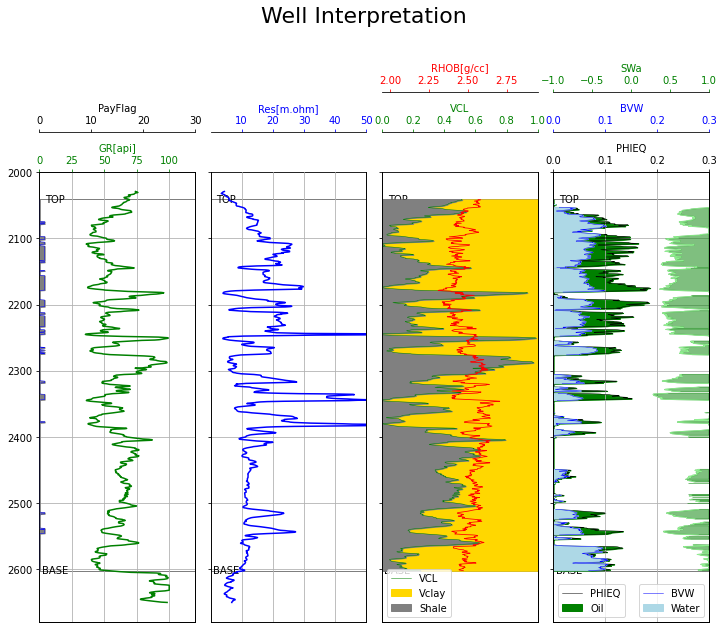

In [28]:
Petrophysic_plot(2000,2680)

In [0]:
# Great Job just make this more appealing as you want!!